# imports

In [1]:
# essential imports

In [2]:
import pandas as pd 
import numpy as np

In [3]:
# visual imports

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
# sns.set_palette('Paired')

# import data

In [5]:
# import individual stats data
stats = pd.read_csv('all-table1.csv', index_col= 0)

In [6]:
# import individual match data
match = pd.read_csv('match.csv', index_col= 0)

In [7]:
# import merge stats and match, merged stats
merged = pd.read_csv('merged.csv', index_col= 0)

In [8]:
# put columns names in a list
cols = stats.columns.to_list()

In [9]:
# take the name, lower, replace the spaces with underscore and save them to cols*
cols = [i.lower().replace(' ', '_') for i in cols]

In [10]:
# the df columns now = the list cols
stats.columns = cols

In [11]:
# define a lambda function to extract the last string after the last hyphen
# extract_last_string = lambda x: x.split('-')[-1]
# apply the lambda function to the 'robot' and create a new column 'last_string'
# stats['last_string'] = stats['robot'].apply(extract_last_string)

In [12]:
# looking at
stats.sort_values(by = 'total_matches',ascending= False)

,total_matches,win_percentage,total_wins,losses,knockouts,ko_percentage,average_knockout_time,knockouts_against,ko_against_percentage,judges_decision_wins,robot
180,39.0,69%,27.0,12.0,19.0,49%,87 s,10,26%,8.0,witch-doctor-2020
56,39.0,69%,27.0,12.0,19.0,49%,87 s,10,26%,8.0,witch-doctor-wcvii
247,39.0,69%,27.0,12.0,19.0,49%,87 s,10,26%,8.0,25345
117,39.0,69%,27.0,12.0,19.0,49%,87 s,10,26%,8.0,witch-doctor-2021
301,39.0,69%,27.0,12.0,19.0,49%,87 s,10,26%,8.0,witch-doctor-2018
...,...,...,...,...,...,...,...,...,...,...,...
326,0.0,0%,0.0,0.0,0.0,0,0,0,0%,0.0,hellachopper
343,0.0,0%,0.0,0.0,0.0,0,0,0,0%,0.0,preying-mantis
14,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,dragon-king-wcvii
11,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,doom-wcvii


In [13]:
num_strip = lambda x: str(x).split('%')[0] if isinstance(x, str) else x
stats['win_percentage'] = stats['win_percentage'].apply(num_strip)
stats['win_percentage'] = stats.win_percentage.astype('float')

In [14]:
# this cleans the ko_percentage
num_strip = lambda x: str(x).split('%')[0] if isinstance(x, str) else x
stats['ko_percentage'] = stats['ko_percentage'].apply(num_strip)
stats['ko_percentage'] = stats.ko_percentage.astype('float') 

In [15]:
# this cleans the average_knockout_time
num_strip = lambda x: str(x).split(' ')[0] if isinstance(x, str) else x
stats['average_knockout_time'] = stats['average_knockout_time'].apply(num_strip)
stats['average_knockout_time'] = stats.ko_percentage.astype('float') 

In [16]:
names = [s.split('-')[0] for s in stats['robot']]

# replace the name_suffix column with the new names column
stats['robots'] = names

# add the season column to the DataFrame
stats['season'] = [s.split('-')[-1] for s in stats['robot']]


# Stats Explore

# Who has played the most matches

<AxesSubplot:xlabel='total_matches', ylabel='robot'>

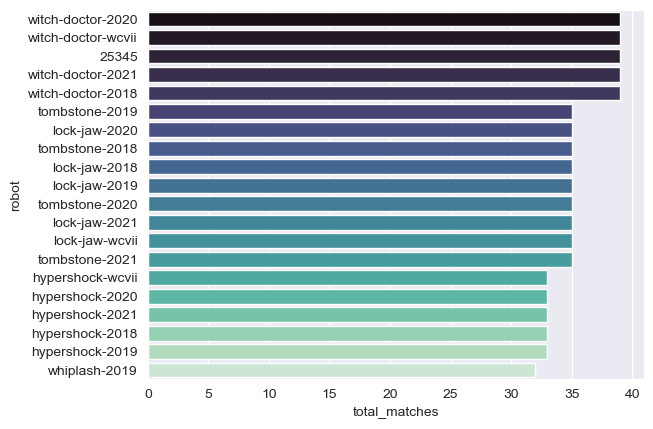

In [17]:
sns.barplot(palette= 'mako',x = 'total_matches', y = 'robot', data = stats.sort_values(by = 'total_matches',ascending= False).head(20))


# What robots are playing the least amount of matches

<AxesSubplot:xlabel='total_matches', ylabel='robot'>

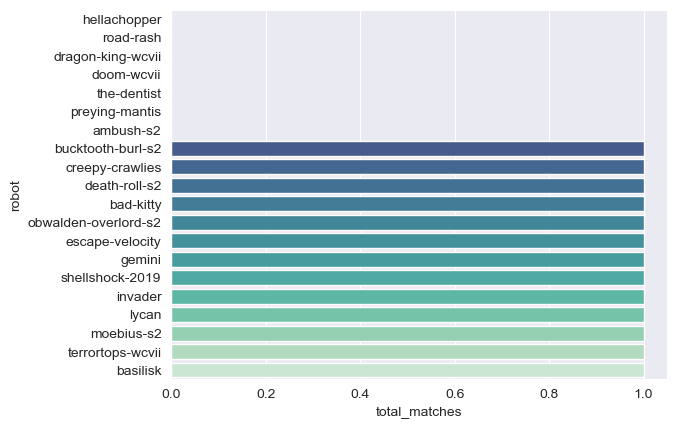

In [18]:
sns.barplot(palette= 'mako',x = 'total_matches', y = 'robot', data = stats.sort_values(by = 'total_matches',ascending= True).head(20))



# what robots are winning 50 % of their matches

In [19]:
test = '33%'

In [20]:
test.split('%')[0]

'33'

In [21]:
win_fifty_or_more = stats[stats.win_percentage >= 50]

In [22]:
win_fifty_or_more = win_fifty_or_more.sort_values(by = ['total_matches', 'win_percentage', 'ko_percentage'],ascending= False)

<AxesSubplot:xlabel='total_matches', ylabel='robot'>

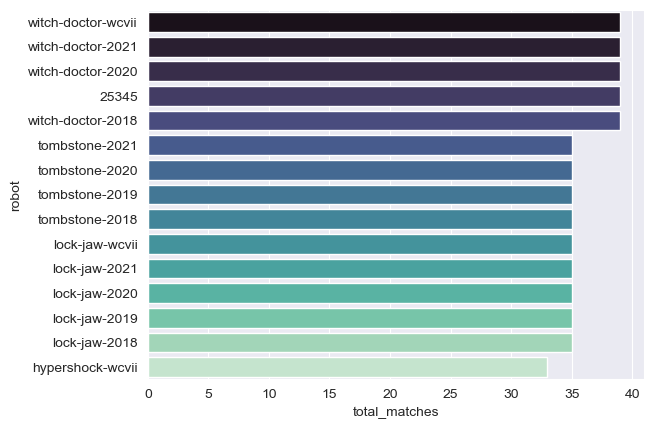

In [23]:
sns.barplot(palette= 'mako',x = 'total_matches', y = 'robot', data = win_fifty_or_more.head(15))

In [24]:
test = '87 s'

In [25]:
str(test).split(' ')[0]

'87'

In [26]:
win_fifty_or_more

,total_matches,win_percentage,total_wins,losses,knockouts,ko_percentage,average_knockout_time,knockouts_against,ko_against_percentage,judges_decision_wins,robot,robots,season
56,39.0,69.0,27.0,12.0,19.0,49.0,49.0,10,26%,8.0,witch-doctor-wcvii,witch,wcvii
117,39.0,69.0,27.0,12.0,19.0,49.0,49.0,10,26%,8.0,witch-doctor-2021,witch,2021
180,39.0,69.0,27.0,12.0,19.0,49.0,49.0,10,26%,8.0,witch-doctor-2020,witch,2020
247,39.0,69.0,27.0,12.0,19.0,49.0,49.0,10,26%,8.0,25345,25345,25345
301,39.0,69.0,27.0,12.0,19.0,49.0,49.0,10,26%,8.0,witch-doctor-2018,witch,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2.0,50.0,1.0,1.0,0.0,0.0,0.0,1,50%,1.0,plan-x,plan,x
379,2.0,50.0,1.0,1.0,0.0,0.0,0.0,1,50%,1.0,radioactive,radioactive,radioactive
13,1.0,100.0,1.0,0.0,1.0,100.0,100.0,0,0%,0.0,double-tap-wcvii,double,wcvii
52,1.0,100.0,1.0,0.0,1.0,100.0,100.0,0,0%,0.0,terrortops-wcvii,terrortops,wcvii


In [27]:
heavy_hitters = win_fifty_or_more[(win_fifty_or_more.ko_percentage >= 50) & (win_fifty_or_more.average_knockout_time <= 50)]

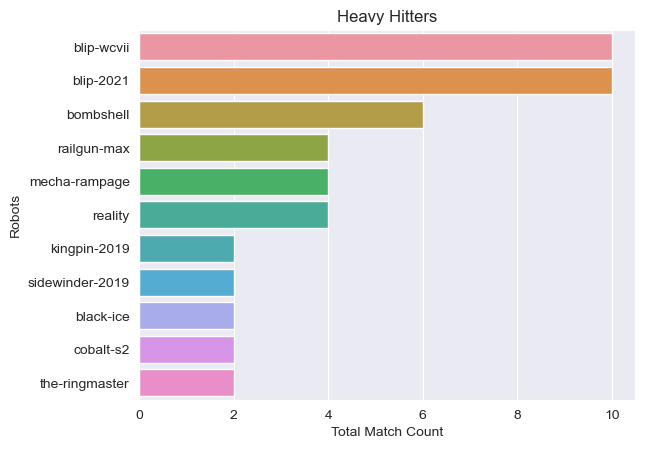

In [28]:
sns.barplot(y = 'robot', x = 'total_matches', data = heavy_hitters)
plt.title('Heavy Hitters')
plt.xlabel('Total Match Count')
plt.ylabel('Robots')

None

<div class="alert alert-block alert-success">
<b>Heavy Hitters:</b> 
This is comprised of robots that meet this criteria
    
* win_percentage > 50%
    
* average_knockout_time > 50 seconds or less
</div>

# Let's look at losers

In [29]:
losers = stats[stats.win_percentage <= 49]

In [30]:
losers = losers.sort_values(by=['total_matches', 'win_percentage'], ascending=[False, False])


In [31]:
losers

,total_matches,win_percentage,total_wins,losses,knockouts,ko_percentage,average_knockout_time,knockouts_against,ko_against_percentage,judges_decision_wins,robot,robots,season
6,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shredderator-wcvii,captain,wcvii
63,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shrederator-2021,captain,2021
130,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shrederator-2020,captain,2020
190,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shrederator-2019,captain,2019
258,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shrederator-3,captain,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,ambush-s2,ambush,s2
321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,the-dentist,the,dentist
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,hellachopper,hellachopper,hellachopper
343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,preying-mantis,preying,mantis


In [32]:
losers = losers.drop_duplicates(subset = 'robots')

<AxesSubplot:xlabel='total_matches', ylabel='robot'>

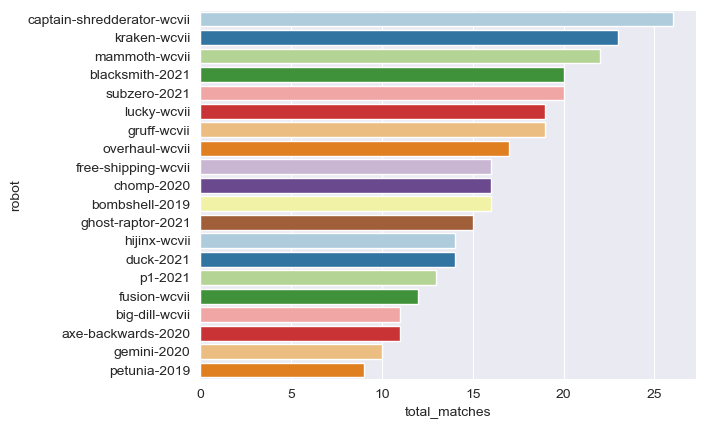

In [33]:
sns.barplot(y = 'robot', x = 'total_matches', data = losers.head(20), palette= 'Paired')

In [34]:
losers

,total_matches,win_percentage,total_wins,losses,knockouts,ko_percentage,average_knockout_time,knockouts_against,ko_against_percentage,judges_decision_wins,robot,robots,season
6,26.0,27.0,7.0,19.0,7.0,27.0,27.0,15,58%,0.0,captain-shredderator-wcvii,captain,wcvii
28,23.0,22.0,5.0,18.0,0.0,0.0,0.0,7,30%,5.0,kraken-wcvii,kraken,wcvii
33,22.0,41.0,9.0,13.0,6.0,27.0,27.0,8,36%,2.0,mammoth-wcvii,mammoth,wcvii
59,20.0,40.0,8.0,12.0,3.0,15.0,15.0,2,10%,4.0,blacksmith-2021,blacksmith,2021
109,20.0,35.0,7.0,13.0,7.0,35.0,35.0,8,40%,0.0,subzero-2021,subzero,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0%,0.0,sweet-revenge,sweet,revenge
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,ambush-s2,ambush,s2
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,hellachopper,hellachopper,hellachopper
343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0%,0.0,preying-mantis,preying,mantis


# match dataset

In [35]:
match.Matchup[0]

'Switchback vs Banshee'

In [36]:
test = 'Switchback vs Banshee'

In [37]:
test.split('vs')[0]

'Switchback '

In [38]:
main = lambda x : x.split('vs')[0]
opp = lambda x : x.split('vs')[1]

In [39]:
# Filter out non-string and missing values from 'Matchup' column
match = match.loc[match['Matchup'].apply(lambda x: isinstance(x, str) and x != '')]

# Apply lambda function to create new 'main' column
match['main'] = match['Matchup'].apply(main)

In [40]:
# Filter out non-string and missing values from 'Matchup' column
match = match.loc[match['Matchup'].apply(lambda x: isinstance(x, str) and x != '')]

# Apply lambda function to create new 'main' column
match['opp'] = match['Matchup'].apply(opp)

In [41]:
# I split this column into two. Main which is the main robot versus the opponent.
match = match.drop(columns= 'Matchup')

In [42]:
match.Results[0]

'Switchback by JD'

In [43]:
test = 'Gigabyte by KO 2m53s'

In [44]:
test.split('by')

['Giga', 'te ', ' KO 2m53s']

In [45]:
winner = lambda x : x.rsplit('by',1)[0].strip() if isinstance(x, str) else None
# finds the last by
win_type = lambda x : x.rsplit('by', 1)[-1].strip() if isinstance(x, str) else None


In [46]:
# Filter out non-string and missing values from 'Results' column
match = match.loc[match['Results'].apply(lambda x: isinstance(x, str) and x != '')]

# Apply lambda function to create new 'winner' column
match['winner'] = match['Results'].apply(winner)

In [47]:
# Filter out non-string and missing values from 'Results' column
match = match.loc[match['Results'].apply(lambda x: isinstance(x, str) and x != '')]

# Apply lambda function to create new 'winner' column
match['win_type'] = match['Results'].apply(win_type)

In [48]:
strip = lambda x : x.strip(' ') if isinstance(x, str) else None

# Apply lambda function to create new 'winner' column
match['win_type'] = match['win_type'].apply(strip)

In [55]:
match.drop(columns= ["Results","robot","Opponent"],inplace = True)

In [54]:
# fix these 4 indivdual errors
match[match.Results == "Pain Train"].win_type  = 'KO'

/var/folders/d0/5dr5q0n145vcn3_m9dxy1xq80000gn/T/ipykernel_14605/3718011968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match[match.Results == "Pain Train"].win_type  = 'KO'


In [66]:
test = 'KO 1m50s'

In [67]:
test.split(' ')

['KO', '1m50s']

In [72]:
time = lambda x : x.split(' ')[1] if isinstance(x, str) and ' ' in x else None


# Apply lambda function to create new 'winner' column
match['ko_time'] = match['win_type'].apply(time)

In [73]:
match

,Season,Round,main,opp,winner,win_type,ko_time
0,WCVII,Episode 702,Switchback,Banshee,Switchback,JD,None
1,WCVII,Episode 706,Banshee,Valkyrie,Banshee,JD,None
2,WCVII,Episode 710,Emulsifier,Banshee,Emulsifier,KO 1m50s,1m50s
4,WCVII,Episode 704,Kraken,Beta,Beta,JD,None
5,WCVII,Episode 708,Beta,Shatter,Beta,JD,None
...,...,...,...,...,...,...,...
4950,2016,Qualifiers Session 1,Lock-Jaw,Yeti,Yeti,JD,None
4951,2016,Quarter Finals,Chomp,Yeti,Yeti,KO 2m24s,2m24s
4952,2016,Round of 32,Yeti,Lucky,Yeti,KO 2m44s,2m44s
4953,2016,Semi Finals,Tombstone,Yeti,Tombstone,JD,None
